In [1]:
import pandas as pd
import numpy as np
from scipy.fftpack import fft, fftfreq
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

## Пункт 1

In [2]:
def signal(n):
    t, Y = np.linspace(0, 31, n), 0
    A = np.random.randint(1, 11, 11)
    W = np.arange(0, 1.01*np.pi, 0.1*np.pi)
    Phi = np.random.uniform(0, 0.5, [11,])
    for a, w, phi in zip(A, W, Phi):
        Y += a*np.cos(w*t+phi)
    Y = Y/np.sum(A)
    return t, Y

## Пункт 2

In [3]:
t, Y = signal(310)
df_a = pd.DataFrame({'t': t, 'Y': Y})

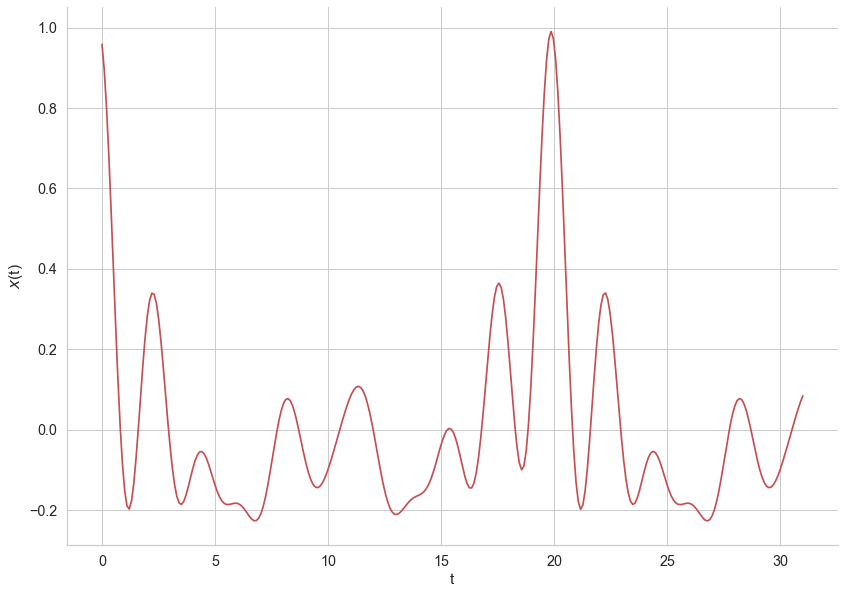

In [4]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_a, x='t', y='Y', linewidth=1.7, color='r',
                 kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels('t', r'$x$(t)')
plt.savefig('pics/2_1.png')
plt.show()

In [5]:
df = df_a.iloc[np.concatenate((np.linspace(0, 300, 31), [309]), axis=0)]

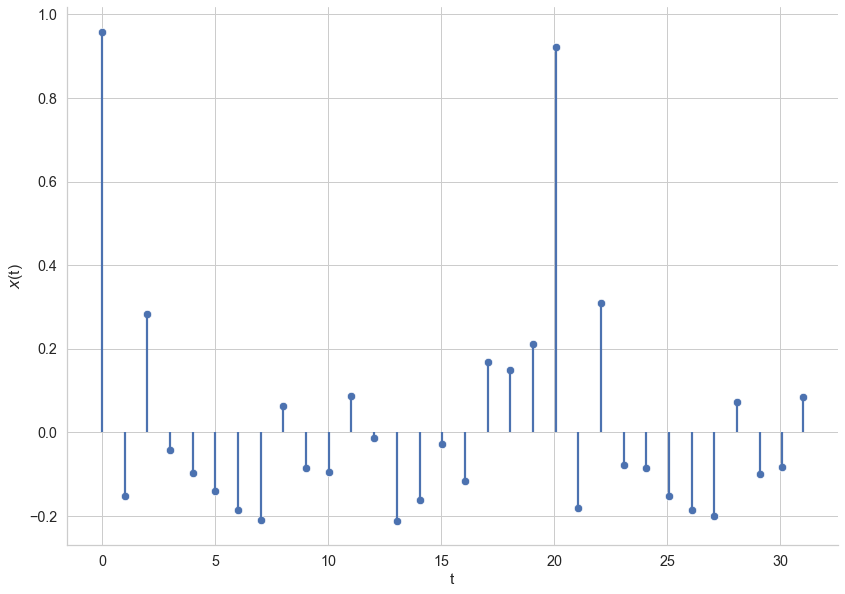

In [6]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df, x='t', y='Y',  color='b', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=df['t'], ymin=0, ymax=df['Y'], linewidth=2.2)
ax.set_axis_labels('t', r'$x$(t)')
plt.savefig('pics/2_2.png')
plt.show()

## Пункт 3

In [7]:
df_3 = df.copy()
df_3['Y'] = np.abs(fft(df_3['Y'].values))

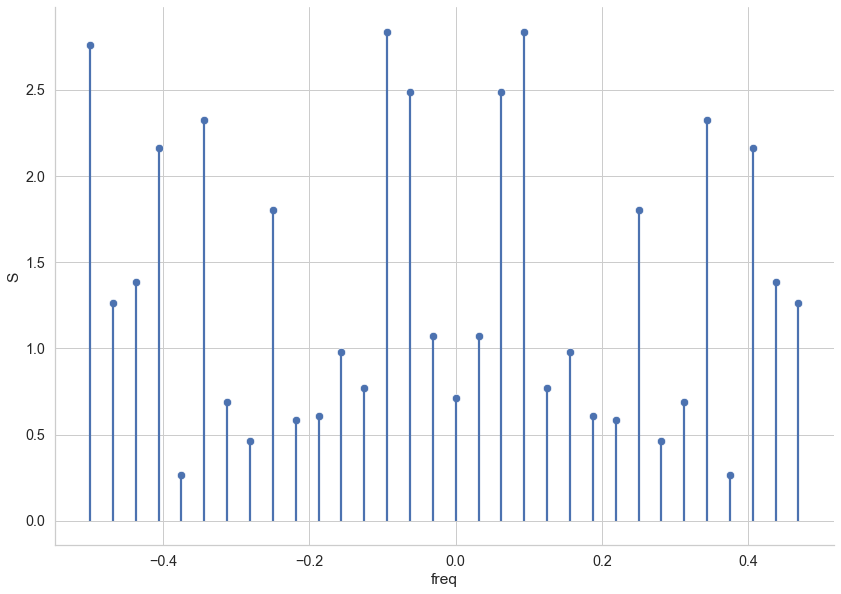

In [8]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_3, x=fftfreq(32, 1), y='Y',  color='b', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=fftfreq(32, 1), ymin=0, ymax=df_3['Y'], linewidth=2.2)
ax.set_axis_labels('freq', r'S')
plt.savefig('pics/3.png')
plt.show()

## Пункт 5

### Линейное сглаживание по 5 и 9 точкам

In [9]:
df_47 = df.copy()
df_47['original'] = df_47['Y']
df_47['5dots'] = np.convolve(df['Y'], np.ones(5), 'same') / 5
df_47['9dots'] = np.convolve(df['Y'], np.ones(9), 'same') / 9
df_47m5 = df_47.melt(id_vars='t', value_vars=['original', '5dots'], var_name='cols', value_name='vals')
df_47m9 = df_47.melt(id_vars='t', value_vars=['original', '9dots'], var_name='cols', value_name='vals')

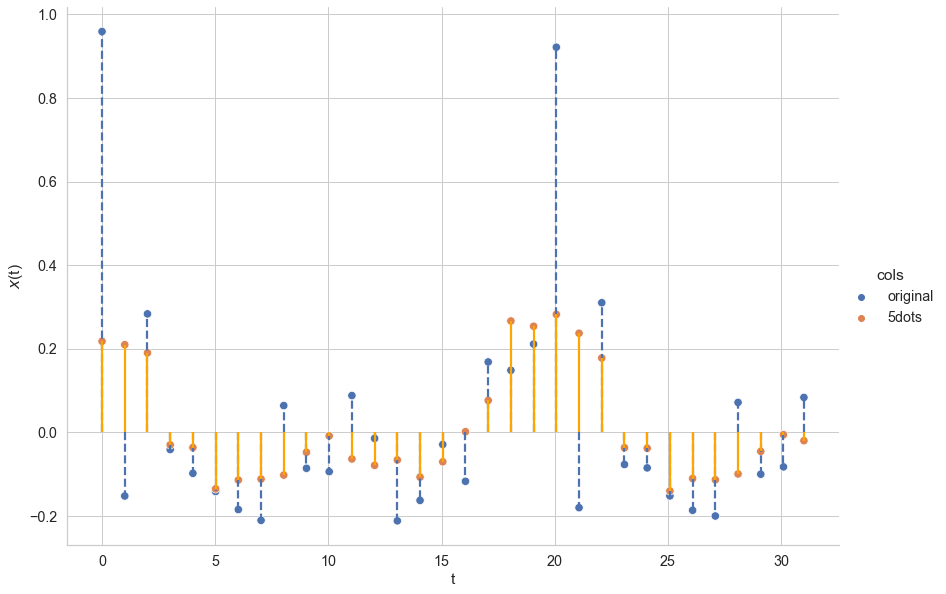

In [10]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_47m5, x='t', y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=df_47['t'], ymin=0, ymax=df_47['original'], linewidth=2.2, linestyles='--')
plt.vlines(x=df_47['t'], ymin=0, ymax=df_47['5dots'], linewidth=2.2, color='orange')
ax.set_axis_labels('t', r'$x$(t)')
plt.savefig('pics/5_1.png')
plt.show()

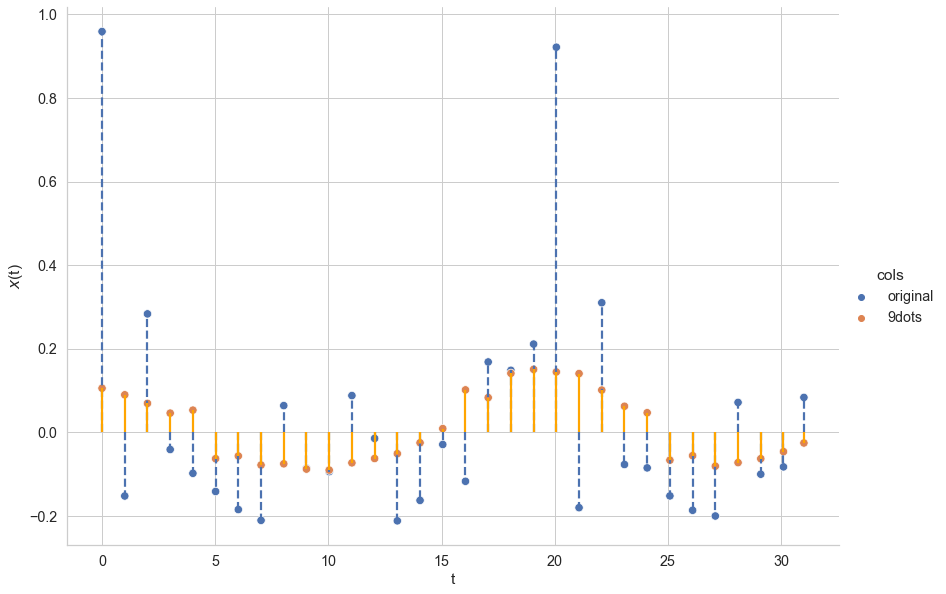

In [11]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_47m9, x='t', y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=df_47['t'], ymin=0, ymax=df_47['original'], linewidth=2.2, linestyles='--')
plt.vlines(x=df_47['t'], ymin=0, ymax=df_47['9dots'], linewidth=2.2, color='orange')
ax.set_axis_labels('t', r'$x$(t)')
plt.savefig('pics/5_2.png')
plt.show()

## Пункт 6

In [12]:
fftf_dt = np.concatenate((fftfreq(32, 1), fftfreq(32, 1)), axis=0)
fftf_t = fftfreq(32, 1)

In [13]:
df_47['dfp_original'] = 2*np.abs(fft(df_47['Y'].values))/32
df_47['dfp_5dots'] = 2*np.abs(fft(df_47['5dots'].values))/32
df_47['dfp_9dots'] = 2*np.abs(fft(df_47['9dots'].values))/32
df_47m5dfp = df_47.melt(id_vars='t', value_vars=['dfp_original', 'dfp_5dots'], var_name='cols', value_name='vals')
df_47m9dfp = df_47.melt(id_vars='t', value_vars=['dfp_original', 'dfp_9dots'], var_name='cols', value_name='vals')

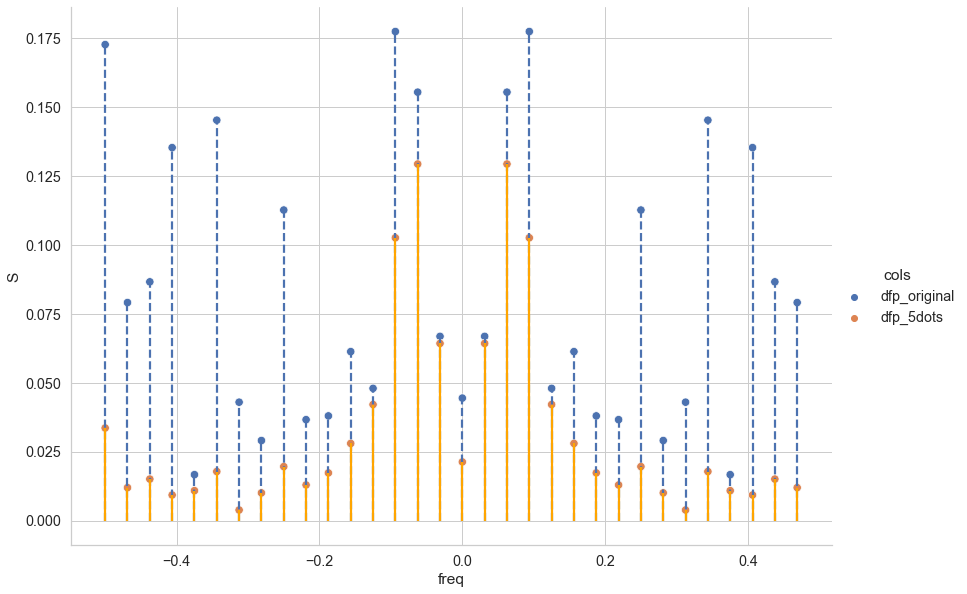

In [14]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_47m5dfp, x=fftf_dt, y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=fftf_t, ymin=0, ymax=df_47['dfp_original'], linewidth=2.2, linestyles='--')
plt.vlines(x=fftf_t, ymin=0, ymax=df_47['dfp_5dots'], linewidth=2.2, color='orange')
ax.set_axis_labels('freq', r'S')
plt.savefig('pics/6_1.png')
plt.show()

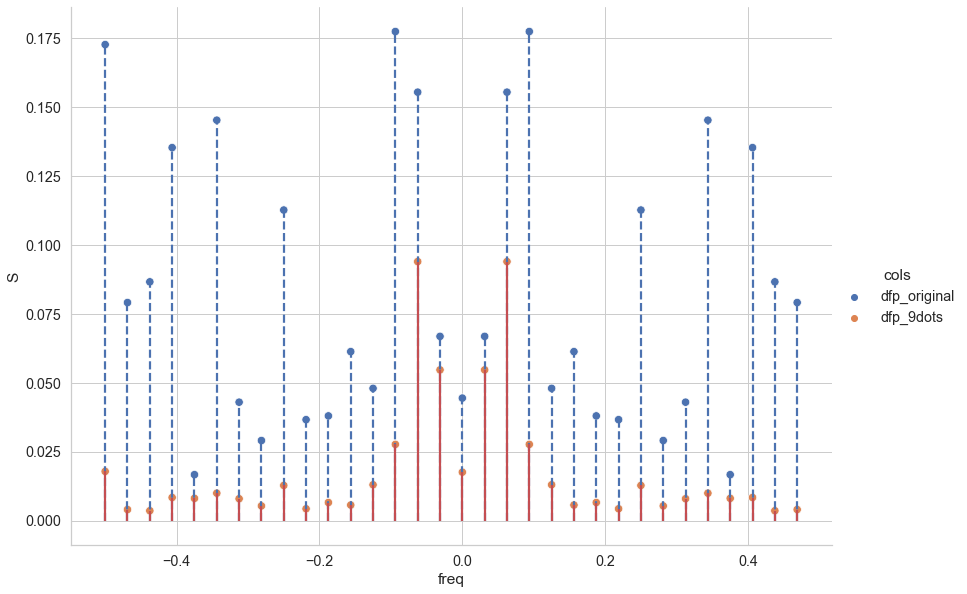

In [15]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_47m9dfp, x=fftf_dt, y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=fftf_t, ymin=0, ymax=df_47['dfp_original'], linewidth=2.2, linestyles='--')
plt.vlines(x=fftf_t, ymin=0, ymax=df_47['dfp_9dots'], linewidth=2.2, color='r')
ax.set_axis_labels('freq', r'S')
plt.savefig('pics/6_2.png')
plt.show()

## Пункт 8

### A. Сглаживание полиномом 2-ой степени по 5 и 9 узлам

In [16]:
df_8a = df.copy()
df_8a['original'] = df_8a['Y']
df_8a = df_8a.drop(['Y'], axis=1)
df_8a['5dots'] = np.convolve(df['Y'], np.array([-3, 12, 17, 12, -3]), 'same') / 35
df_8a['9dots'] = np.convolve(df['Y'], np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]), 'same') / 231
df_8a_m = df_8a.melt(id_vars='t', var_name='cols', value_name='vals')

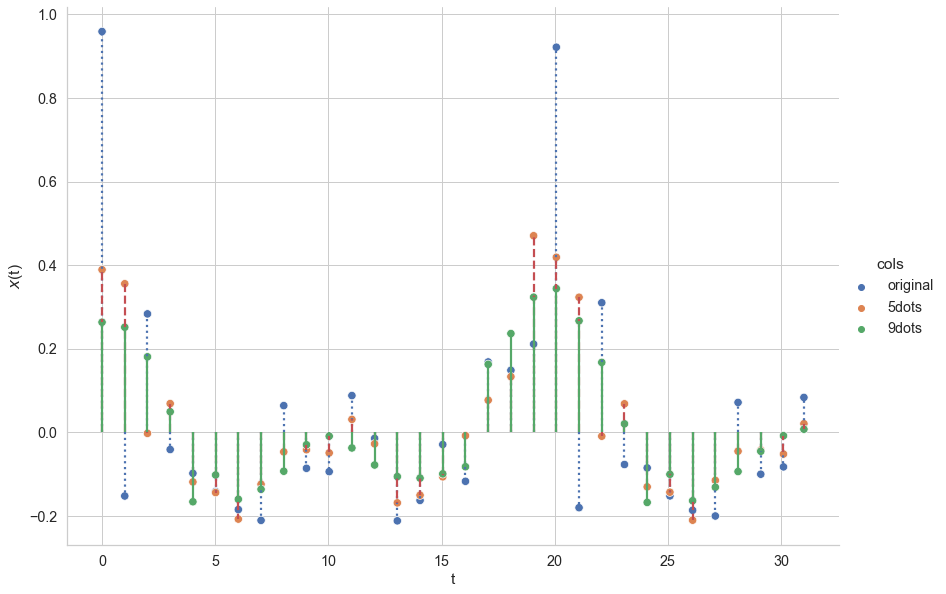

In [17]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_8a_m, x='t', y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=df_8a['t'], ymin=0, ymax=df_8a['original'], linewidth=2.2, linestyles='dotted')
plt.vlines(x=df_8a['t'], ymin=0, ymax=df_8a['5dots'], linewidth=2.2, color='r', linestyles='dashed')
plt.vlines(x=df_8a['t'], ymin=0, ymax=df_8a['9dots'], linewidth=2.2, color='g')
ax.set_axis_labels('t', r'$x$(t)')
plt.savefig('pics/8a_01.png')
plt.show()

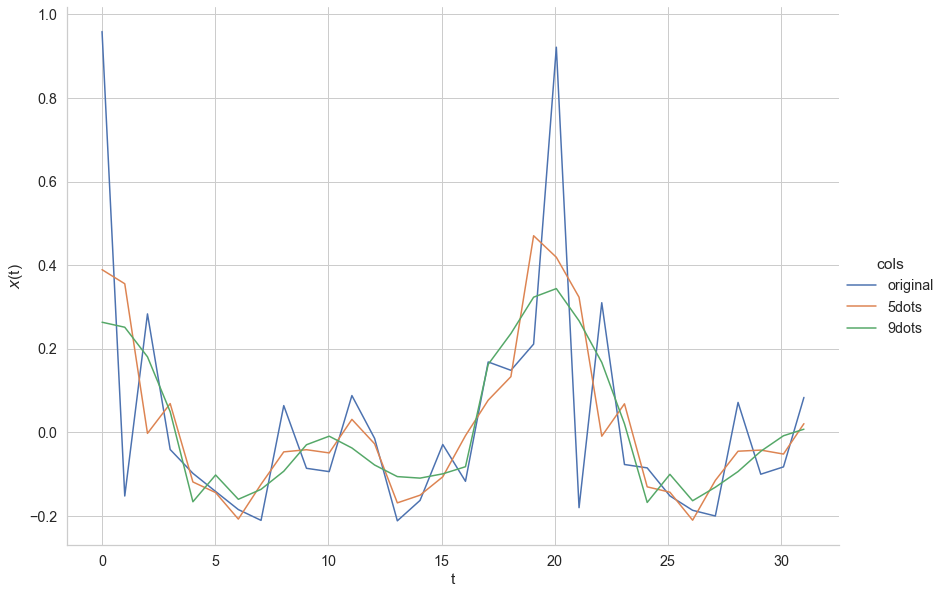

In [18]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_8a_m, x='t', y='vals', hue='cols',
                 kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels('t', r'$x$(t)')
plt.savefig('pics/8a_02.png')
plt.show()

In [19]:
df_8a['dfp_original'] = 2 * np.abs(fft(df_8a['original'].values)) / 32
df_8a['dfp_5dots'] = 2 * np.abs(fft(df_8a['5dots'].values)) / 32
df_8a['dfp_9dots'] = 2 * np.abs(fft(df_8a['9dots'].values)) / 32
df_8a_m5dfp = df_8a.melt(id_vars='t', value_vars=['dfp_original', 'dfp_5dots'], var_name='cols', value_name='vals')
df_8a_m9dfp = df_8a.melt(id_vars='t', value_vars=['dfp_original', 'dfp_9dots'], var_name='cols', value_name='vals')

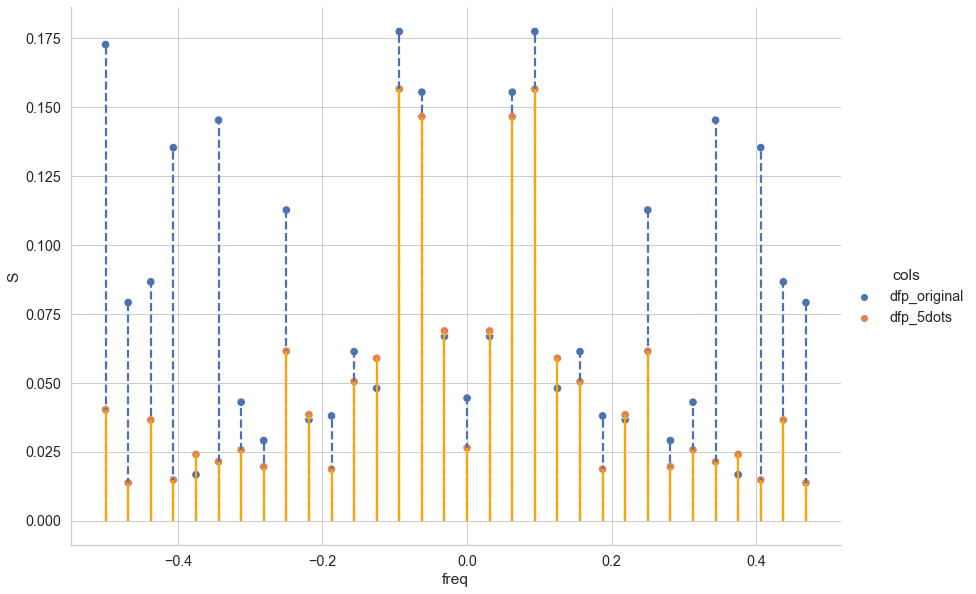

In [20]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_8a_m5dfp, x=fftf_dt, y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=fftf_t, ymin=0, ymax=df_8a['dfp_original'], linewidth=2.2, linestyles='--')
plt.vlines(x=fftf_t, ymin=0, ymax=df_8a['dfp_5dots'], linewidth=2.2, color='orange')
ax.set_axis_labels('freq', r'S')
plt.savefig('pics/8a_2.png')
plt.show()

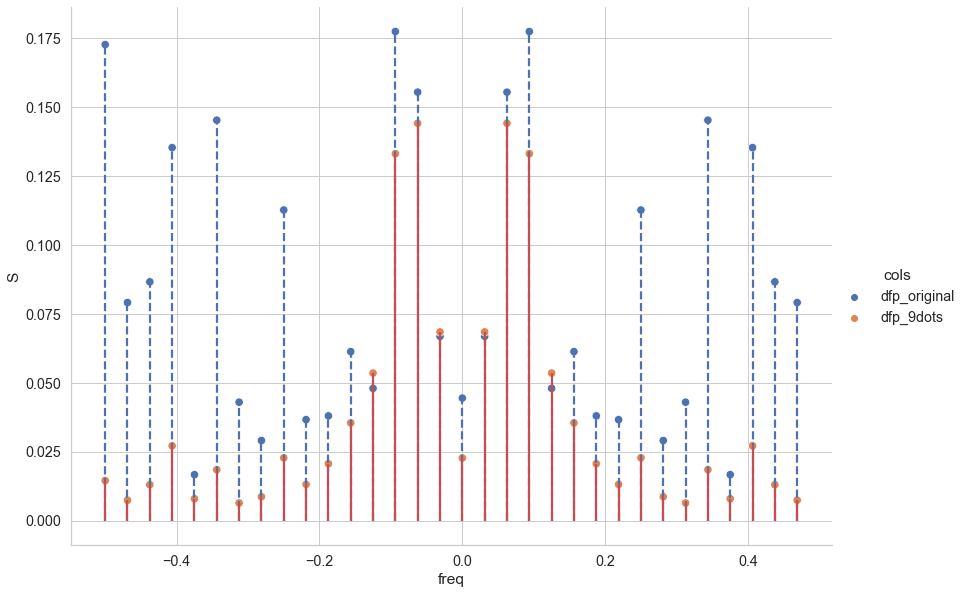

In [21]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_8a_m9dfp, x=fftf_dt, y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=fftf_t, ymin=0, ymax=df_8a['dfp_original'], linewidth=2.2, linestyles='--')
plt.vlines(x=fftf_t, ymin=0, ymax=df_8a['dfp_9dots'], linewidth=2.2, color='r')
ax.set_axis_labels('freq', r'S')
plt.savefig('pics/8a_3.png')
plt.show()

### B. Сглаживание полиномом 4-ой степени по 7 и 11 узлам

In [22]:
df_8b = df.copy()
df_8b['original'] = df_8b['Y']
df_8b = df_8b.drop(['Y'], axis=1)
df_8b['7dots'] = np.convolve(df['Y'], np.array([5, -30, 75, 131, 75, -30, 5]), 'same') / 231
df_8b['11dots'] = np.convolve(df['Y'], np.array([13, -45, -10, 60, 120, 143, 120, 60, -10, -45, 13]), 'same') / 429
df_8b_m = df_8b.melt(id_vars='t', var_name='cols', value_name='vals')

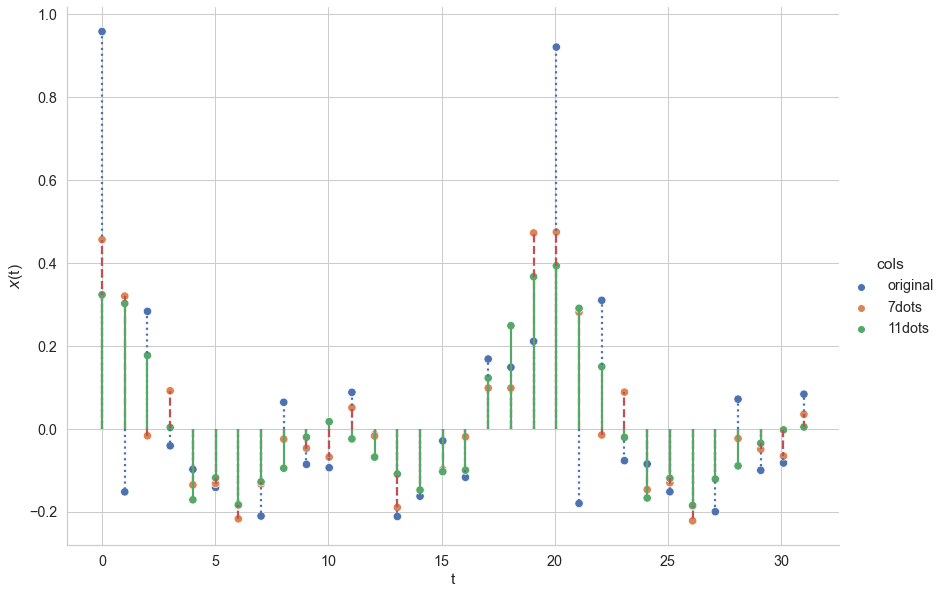

In [23]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_8b_m, x='t', y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=df_8b['t'], ymin=0, ymax=df_8b['original'], linewidth=2.2, linestyles='dotted')
plt.vlines(x=df_8b['t'], ymin=0, ymax=df_8b['7dots'], linewidth=2.2, color='r', linestyles='dashed')
plt.vlines(x=df_8b['t'], ymin=0, ymax=df_8b['11dots'], linewidth=2.2, color='g')
ax.set_axis_labels('t', r'$x$(t)')
plt.savefig('pics/8b_01.png')
plt.show()

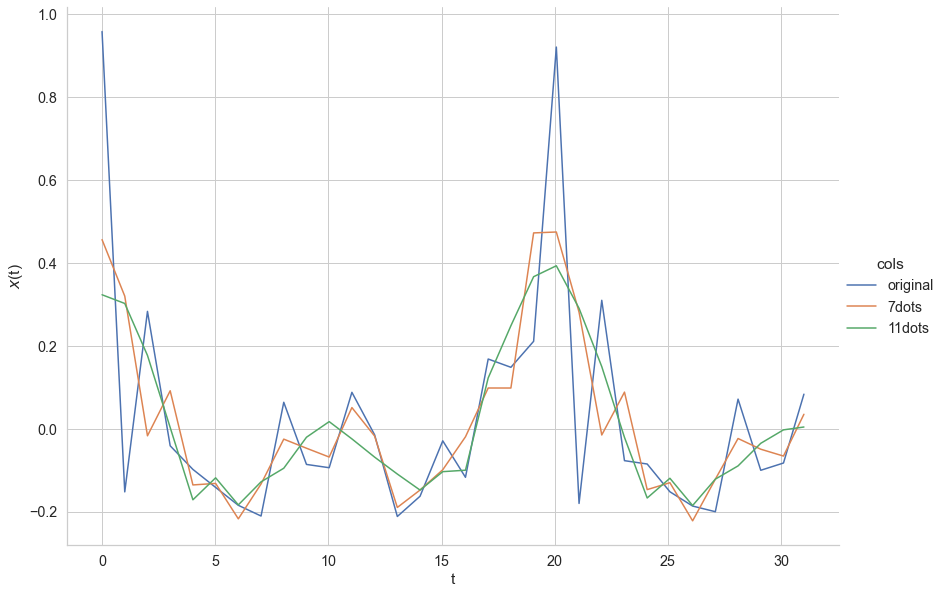

In [24]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_8b_m, x='t', y='vals', hue='cols',
                 kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels('t', r'$x$(t)')
plt.savefig('pics/8b_02.png')
plt.show()

In [25]:
df_8b['dfp_original'] = 2 * np.abs(fft(df_8b['original'].values)) / 32
df_8b['dfp_7dots'] = 2 * np.abs(fft(df_8b['7dots'].values)) / 32
df_8b['dfp_11dots'] = 2 * np.abs(fft(df_8b['11dots'].values)) / 32
df_8b_m7dfp = df_8b.melt(id_vars='t', value_vars=['dfp_original', 'dfp_7dots'], var_name='cols', value_name='vals')
df_8b_m11dfp = df_8b.melt(id_vars='t', value_vars=['dfp_original', 'dfp_11dots'], var_name='cols', value_name='vals')

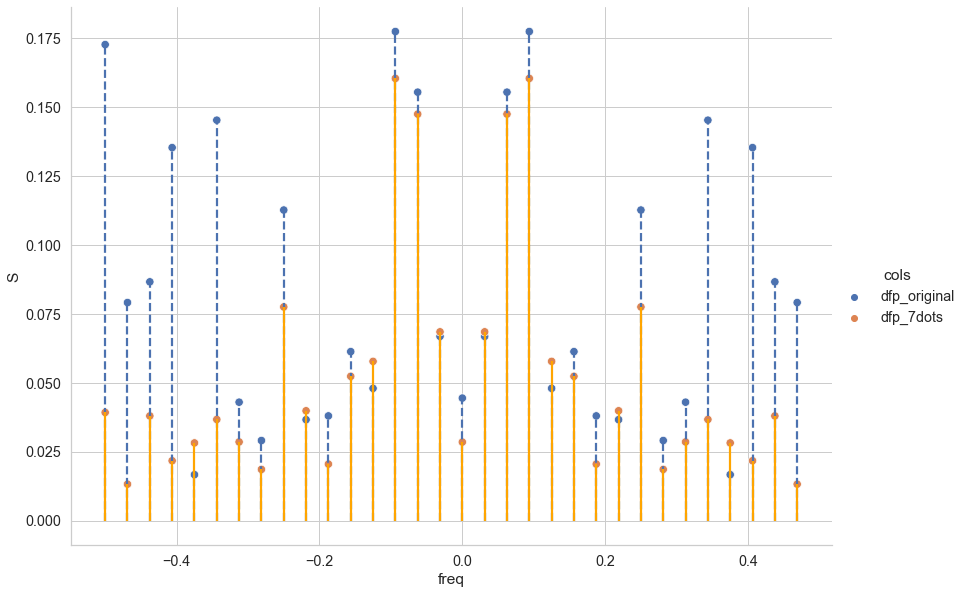

In [26]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_8b_m7dfp, x=fftf_dt, y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=fftf_t, ymin=0, ymax=df_8b['dfp_original'], linewidth=2.2, linestyles='--')
plt.vlines(x=fftf_t, ymin=0, ymax=df_8b['dfp_7dots'], linewidth=2.2, color='orange')
ax.set_axis_labels('freq', r'S')
plt.savefig('pics/8b_2.png')
plt.show()

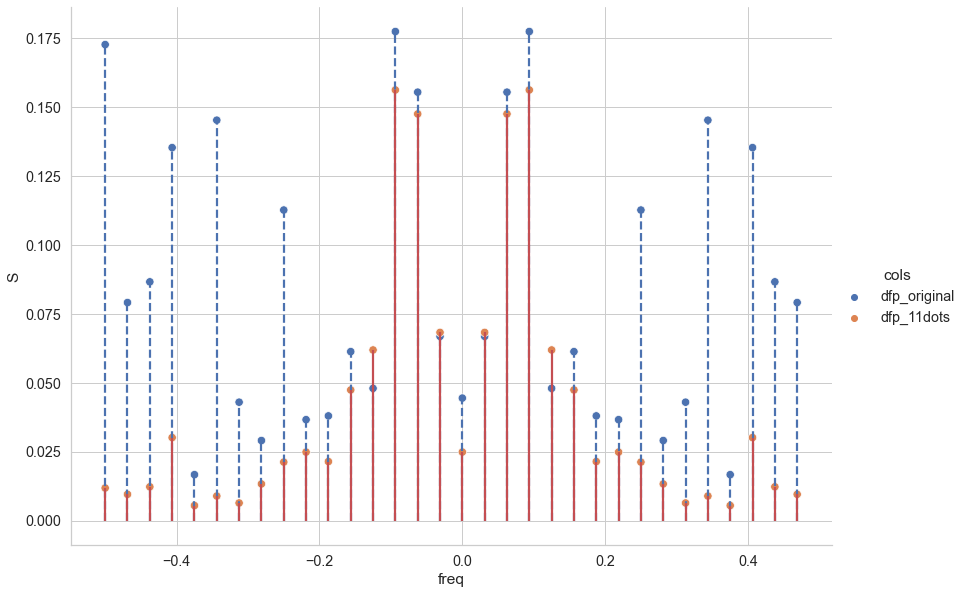

In [27]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_8b_m11dfp, x=fftf_dt, y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=fftf_t, ymin=0, ymax=df_8b['dfp_original'], linewidth=2.2, linestyles='--')
plt.vlines(x=fftf_t, ymin=0, ymax=df_8b['dfp_11dots'], linewidth=2.2, color='r')
ax.set_axis_labels('freq', r'S')
plt.savefig('pics/8b_3.png')
plt.show()

### C. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка

In [28]:
df_8c = df.copy()
df_8c['original'] = df_8c['Y']
df_8c = df_8c.drop(['Y'], axis=1)
df_8c['diff'] = np.convolve(df['Y'], np.array([-1, 0, 1]), 'same') / 2
df_8c_m = df_8c.melt(id_vars='t', var_name='cols', value_name='vals')

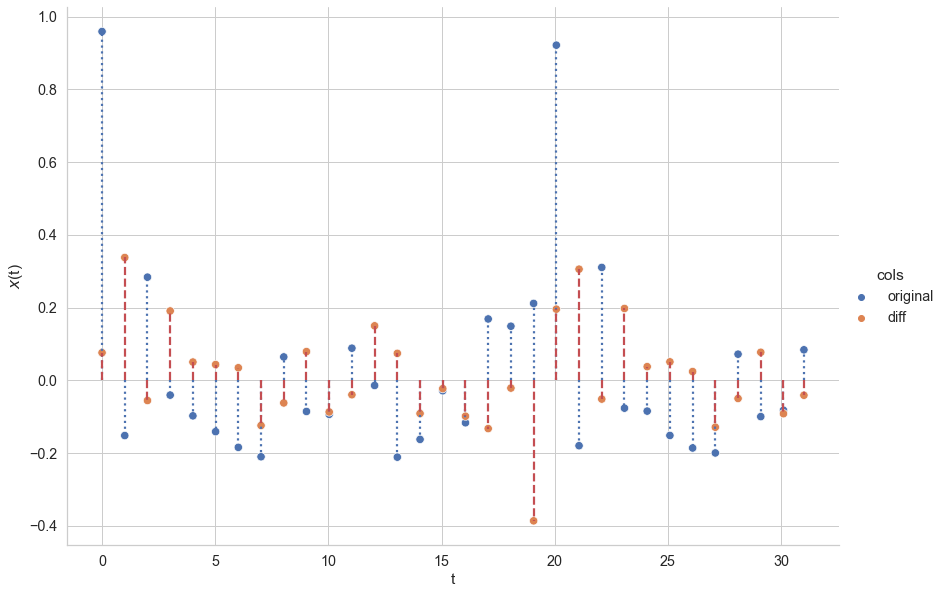

In [29]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_8c_m, x='t', y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=df_8c['t'], ymin=0, ymax=df_8c['original'], linewidth=2.2, linestyles='dotted')
plt.vlines(x=df_8c['t'], ymin=0, ymax=df_8c['diff'], linewidth=2.2, color='r', linestyles='dashed')
ax.set_axis_labels('t', r'$x$(t)')
plt.savefig('pics/8c_01.png')
plt.show()

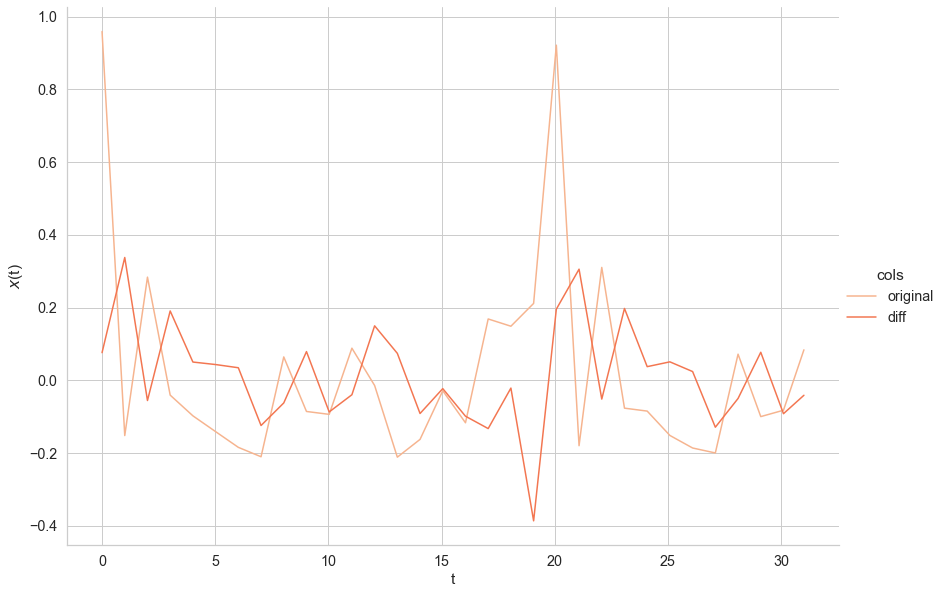

In [30]:
sns.set_theme(style="whitegrid", palette='rocket_r', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_8c_m, x='t', y='vals', hue='cols',
                 kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels('t', r'$x$(t)')
plt.savefig('pics/8c_02.png')
plt.show()

In [31]:
df_8c['dfp_original'] = 2 * np.abs(fft(df_8c['original'].values)) / 32
df_8c['dfp_diff'] = 2 * np.abs(fft(df_8c['diff'].values)) / 32
df_8c_m_diffdfp = df_8c.melt(id_vars='t', value_vars=['dfp_original', 'dfp_diff'], var_name='cols', value_name='vals')

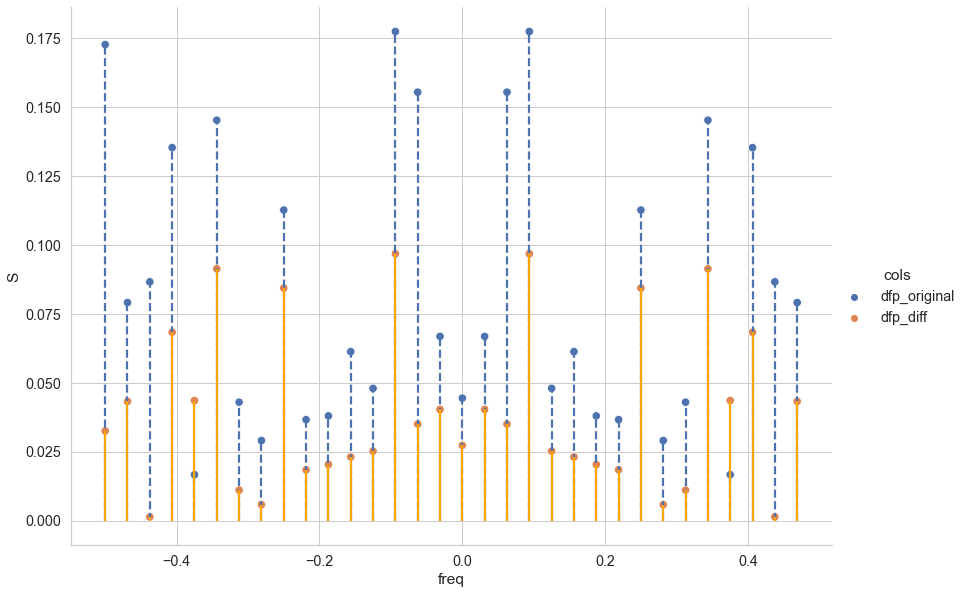

In [32]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_8c_m_diffdfp, x=fftf_dt, y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=fftf_t, ymin=0, ymax=df_8c['dfp_original'], linewidth=2.2, linestyles='--')
plt.vlines(x=fftf_t, ymin=0, ymax=df_8c['dfp_diff'], linewidth=2.2, color='orange')
ax.set_axis_labels('freq', r'S')
plt.savefig('pics/8c_2.png')
plt.show()

### D. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона)

In [33]:
def rect(orig):
    integr = np.empty(len(orig))
    integr[0] = 0
    for i in range(1, len(orig)):
        integr[i] = integr[i-1] + orig[i-1]
    return integr

def trap(orig):
    integr = np.empty(len(orig))
    integr[0] = 0
    for i in range(1, len(orig)-1):
        integr[i] = integr[i - 1] + (orig[i] + orig[i-1]) / 2
    return integr

def simpson(orig):
    integr = np.empty(len(orig))
    integr[0] = 0
    for i in range(1, len(orig)-1):
        integr[i] = integr[i-1] + (orig[i-1] + 4*orig[i] + orig[i+1]) / 3
    return integr

In [34]:
df_8d = df.copy()
df_8d['original'] = df_8d['Y']
df_8d = df_8d.drop(['Y'], axis=1)
df_8d['rect'] = rect(df_8d['original'].values)
df_8d['trap'] = trap(df_8d['original'].values)
df_8d['simp'] = simpson(df_8d['original'].values)
df_8d_m = df_8d.melt(id_vars='t', var_name='cols', value_name='vals')

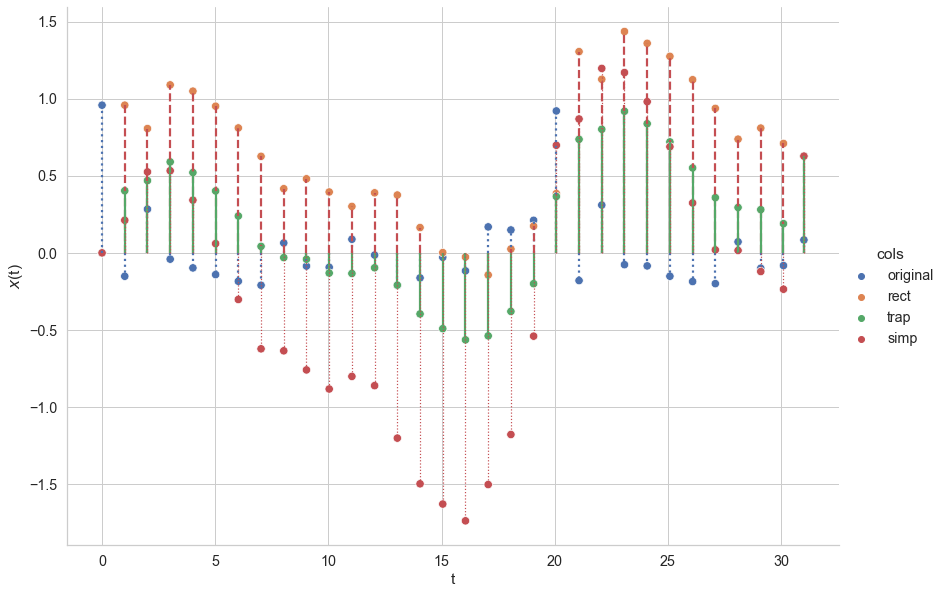

In [35]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_8d_m, x='t', y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=df_8d['t'], ymin=0, ymax=df_8d['original'], linewidth=2.2, linestyles='dotted')
plt.vlines(x=df_8d['t'], ymin=0, ymax=df_8d['rect'], linewidth=2.2, color='r', linestyles='dashed')
plt.vlines(x=df_8d['t'], ymin=0, ymax=df_8d['trap'], linewidth=2.2, color='g')
plt.vlines(x=df_8d['t'], ymin=0, ymax=df_8d['simp'], linewidth=1.2, color='r', linestyles='dotted')
ax.set_axis_labels('t', r'$x$(t)')
plt.savefig('pics/8d_01.png')
plt.show()

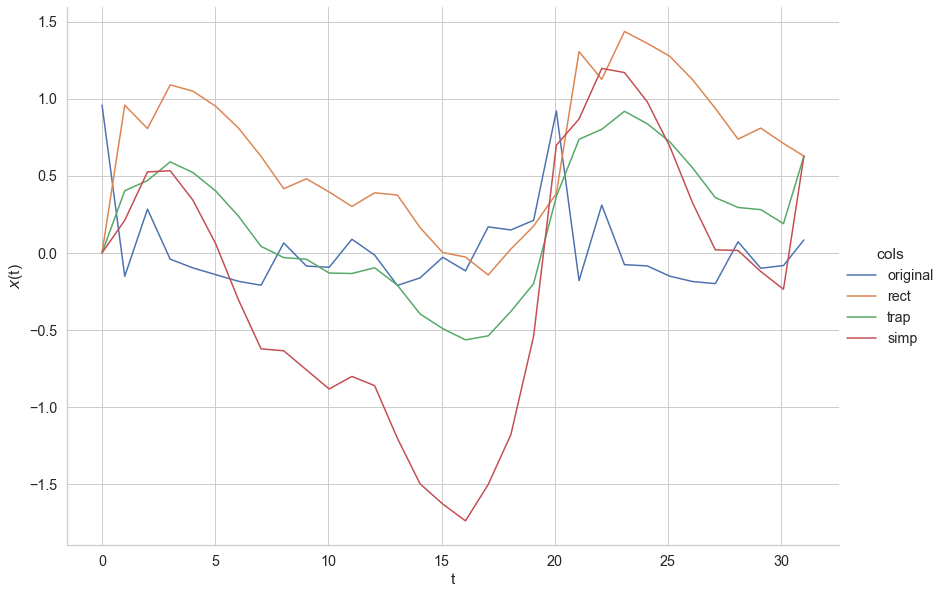

In [36]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_8d_m, x='t', y='vals', hue='cols',
                 kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels('t', r'$x$(t)')
plt.savefig('pics/8d_02.png')
plt.show()

In [37]:
df_8d['dfp_original'] = 2 * np.abs(fft(df_8d['original'].values)) / 32
df_8d['dfp_rect'] = 2 * np.abs(fft(df_8d['rect'].values)) / 32
df_8d['dfp_trap'] = 2 * np.abs(fft(df_8d['trap'].values)) / 32
df_8d['dfp_simp'] = 2 * np.abs(fft(df_8d['simp'].values)) / 32
df_8d_mRdfp = df_8d.melt(id_vars='t', value_vars=['dfp_rect', 'dfp_original'], var_name='cols', value_name='vals')
df_8d_mTdfp = df_8d.melt(id_vars='t', value_vars=['dfp_trap', 'dfp_original'], var_name='cols', value_name='vals')
df_8d_mSdfp = df_8d.melt(id_vars='t', value_vars=['dfp_simp', 'dfp_original'], var_name='cols', value_name='vals')

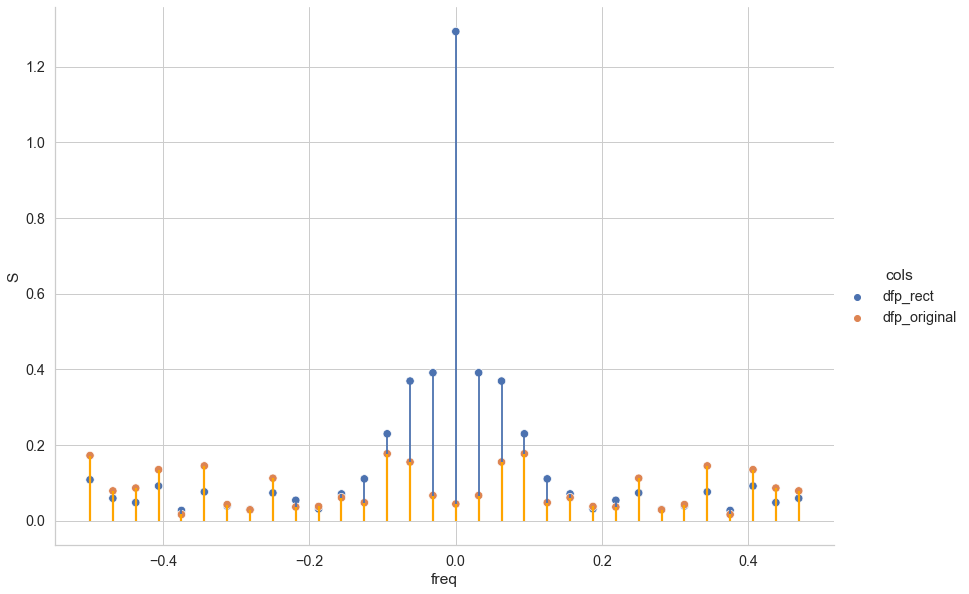

In [38]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_8d_mRdfp, x=fftf_dt, y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=fftf_t, ymin=0, ymax=df_8d['dfp_rect'], linewidth=1.8, linestyles='solid')
plt.vlines(x=fftf_t, ymin=0, ymax=df_8d['dfp_original'], linewidth=2.2, color='orange')
ax.set_axis_labels('freq', r'S')
plt.savefig('pics/8d_2.png')
plt.show()

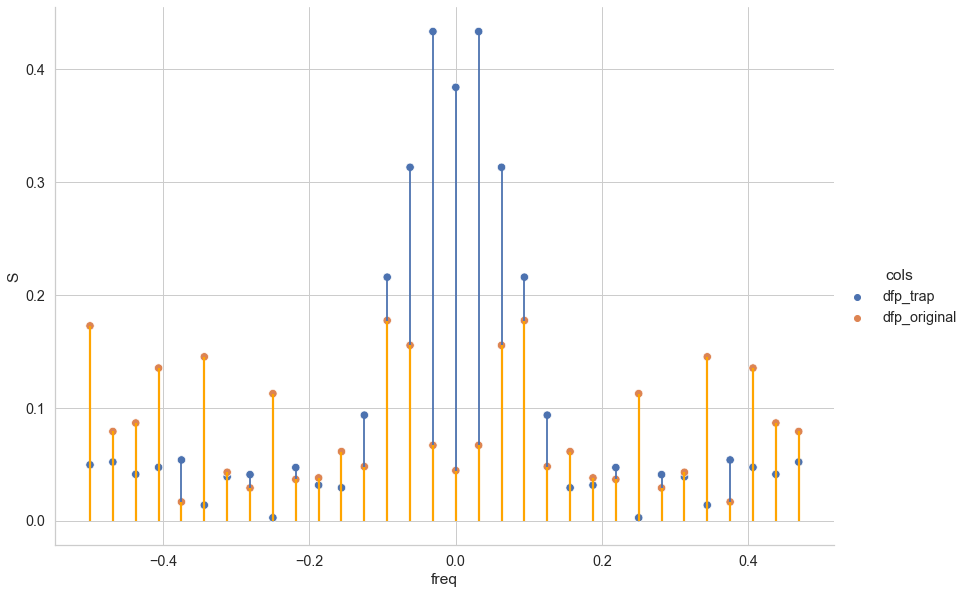

In [39]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_8d_mTdfp, x=fftf_dt, y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=fftf_t, ymin=0, ymax=df_8d['dfp_trap'], linewidth=1.8, linestyles='solid')
plt.vlines(x=fftf_t, ymin=0, ymax=df_8d['dfp_original'], linewidth=2.2, color='orange')
ax.set_axis_labels('freq', r'S')
plt.savefig('pics/8d_3.png')
plt.show()

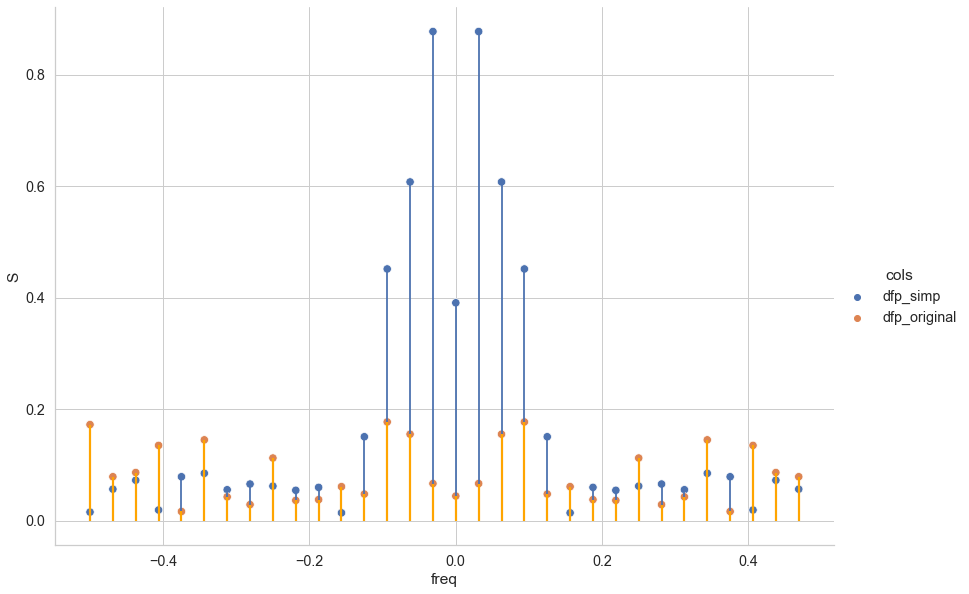

In [40]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_8d_mSdfp, x=fftf_dt, y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
plt.vlines(x=fftf_t, ymin=0, ymax=df_8d['dfp_simp'], linewidth=1.8, linestyles='solid')
plt.vlines(x=fftf_t, ymin=0, ymax=df_8d['dfp_original'], linewidth=2.2, color='orange')
ax.set_axis_labels('freq', r'S')
plt.savefig('pics/8d_4.png')
plt.show()